In [220]:
import pandas as pd
import random

# Definir parâmetros para simulação em São Paulo
num_pacientes = 100000  # Número de pacientes
anos = [random.choice([2018, 2019, 2020, 2021, 2022, 2023, 2024]) for _ in range(num_pacientes)]
generos = [random.choice(['Feminino', 'Masculino']) for _ in range(num_pacientes)]
idades = [random.randint(18, 65) for _ in range(num_pacientes)]  # Geração de idades únicas
cidades = ['São Paulo' if random.random() < 0.8 else 'Fora de São Paulo' for _ in range(num_pacientes)]  # Variar entre 'São Paulo' (80%) e 'Fora de São Paulo' (20%)
motivos_consulta = [random.choice(['Controle de peso', 'Acompanhamento nutricional', 'Orientação alimentar']) for _ in range(num_pacientes)]
estados_saude = [random.choice(['Saudável', 'Com sobrepeso', 'Obeso']) for _ in range(num_pacientes)]
IMCs = [round(random.uniform(18.0, 40.0), 1) for _ in range(num_pacientes)]
atividades_fisicas = [random.choice(['Ativo', 'Pouco ativo', 'Sedentário']) for _ in range(num_pacientes)]
consumos_alimentares = [random.choice(['Equilibrado', 'Excesso de gordura', 'Baixa ingestão de vegetais']) for _ in range(num_pacientes)]

# Simular renda média dos pacientes em São Paulo (em R$)
# Vamos usar uma distribuição normal com média de 15000 e desvio padrão de 1500 para renda mensal
renda_media = [round(random.normalvariate(10000, 2000), 2) for _ in range(num_pacientes)]

# Criar DataFrame pandas com os dados simulados
data = {
    'ano': anos,
    'genero': generos,
    'idade': idades,  # Substituir 'faixa_etaria' por 'idade'
    'cidade': cidades,
    'motivo_consulta': motivos_consulta,
    'estado_saude': estados_saude,
    'IMC': IMCs,
    'atividade_fisica': atividades_fisicas,
    'consumo_alimentar': consumos_alimentares,
    'renda_media': renda_media,  # Adicionar a coluna de renda média
}

df = pd.DataFrame(data)

# Adicionar a coluna 'id' com identificadores únicos
df['id'] = df.index + 1

# Reordenar as colunas
df = df[['id', 'ano', 'genero', 'idade', 'cidade', 'motivo_consulta', 'estado_saude', 'IMC', 'atividade_fisica', 'consumo_alimentar', 'renda_media']]

# Salvar o DataFrame em um arquivo CSV
df.to_csv('procura_nutricionistas_sp_simulado_com_renda.csv', index=False)

print("Dados gerados e salvos com sucesso!")


Dados gerados e salvos com sucesso!


In [221]:
import pandas as pd

# Caminho para o arquivo CSV
csv_path = 'procura_nutricionistas_sp_simulado_com_renda.csv'

# Carregar o arquivo CSV em um DataFrame pandas
df = pd.read_csv(csv_path)

# Visualizar as primeiras linhas do DataFrame
df

,id,ano,genero,idade,cidade,motivo_consulta,estado_saude,IMC,atividade_fisica,consumo_alimentar,renda_media
0,1,2019,Masculino,57,São Paulo,Controle de peso,Obeso,38.5,Sedentário,Baixa ingestão de vegetais,6473.10
1,2,2023,Feminino,37,São Paulo,Orientação alimentar,Obeso,29.5,Sedentário,Excesso de gordura,10091.68
2,3,2021,Feminino,52,São Paulo,Orientação alimentar,Com sobrepeso,38.8,Ativo,Excesso de gordura,11488.32
3,4,2020,Feminino,25,São Paulo,Controle de peso,Saudável,38.4,Ativo,Excesso de gordura,8324.49
4,5,2019,Feminino,26,São Paulo,Controle de peso,Com sobrepeso,23.9,Ativo,Excesso de gordura,9090.35
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2022,Masculino,20,São Paulo,Controle de peso,Saudável,31.2,Pouco ativo,Excesso de gordura,10463.72
99996,99997,2022,Masculino,54,Fora de São Paulo,Orientação alimentar,Obeso,29.9,Pouco ativo,Baixa ingestão de vegetais,9548.90
99997,99998,2020,Masculino,40,Fora de São Paulo,Controle de peso,Com sobrepeso,36.8,Pouco ativo,Baixa ingestão de vegetais,7755.27
99998,99999,2019,Masculino,40,São Paulo,Controle de peso,Obeso,26.5,Ativo,Baixa ingestão de vegetais,9098.66


genero   Feminino  Masculino
cluster                     
0               0      24912
1               0      25081
2           50007          0


<Figure size 1000x600 with 0 Axes>

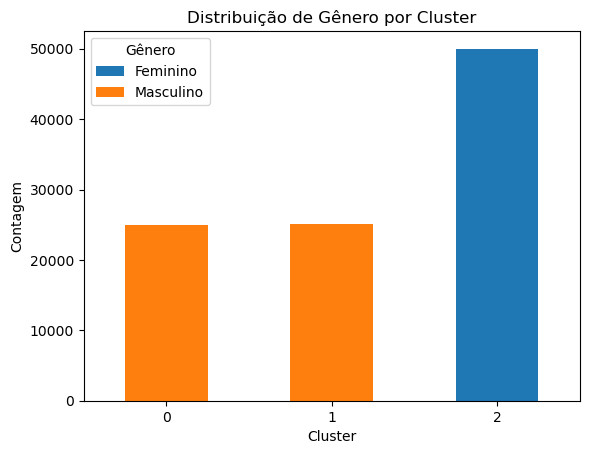

In [222]:
features = ['idade', 'IMC', 'renda_media', 'genero']

# Criar um novo dataframe apenas com as features selecionadas
X = df[features]

# Converter variável 'genero' para numérica (por exemplo, usando one-hot encoding)
X = pd.get_dummies(X, columns=['genero'], drop_first=True)

# Padronizar as features para terem média zero e variância unitária
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o algoritmo K-Means para identificar clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Definir o número de clusters desejado
kmeans.fit(X_scaled)

# Adicionar os rótulos dos clusters de volta ao dataframe original
df['cluster'] = kmeans.labels_

# Analisar a distribuição de gênero em cada cluster
gender_distribution = df.groupby(['cluster', 'genero']).size().unstack(fill_value=0)
print(gender_distribution)

# Visualizar a distribuição de gênero em cada cluster
plt.figure(figsize=(10, 6))
gender_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.title('Distribuição de Gênero por Cluster')
plt.legend(title='Gênero')
plt.xticks(rotation=0)
plt.show()

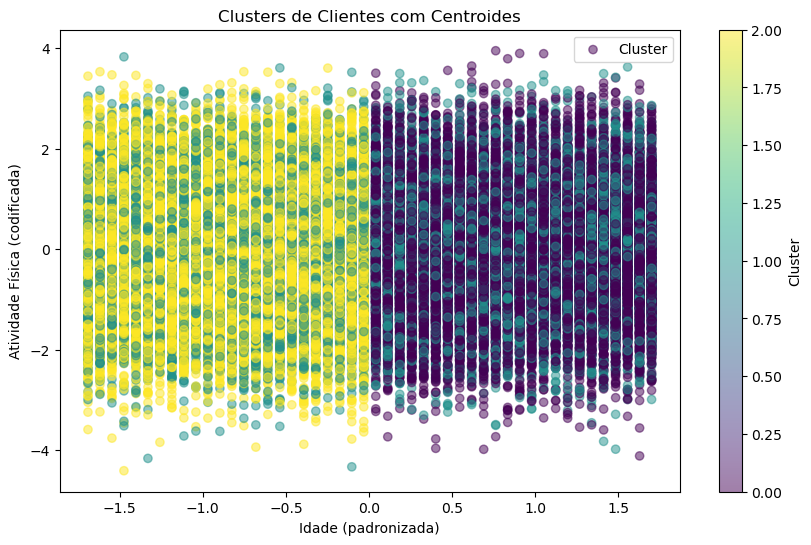

Centroides dos Clusters:
       idade   renda_media  atividade_fisica_encoded
0  53.528856  10002.151108              1.502287e+00
1  41.523734   9999.421576             -1.865175e-14
2  29.502715   9984.848259              1.496573e+00


In [223]:
# Selecionar as variáveis relevantes para a clusterização
features = ['idade', 'atividade_fisica', 'renda_media']

# Criar um novo dataframe apenas com as features selecionadas
X = df[features].copy()  # Usar .copy() para evitar SettingWithCopyWarning

# Converter a variável 'atividade_fisica' em uma variável quantitativa
# Vamos usar LabelEncoder para mapear os valores categóricos para números
le = LabelEncoder()
X['atividade_fisica_encoded'] = le.fit_transform(X['atividade_fisica'])

# Remover a coluna original 'atividade_fisica'
X.drop('atividade_fisica', axis=1, inplace=True)

# Padronizar as features para terem média zero e variância unitária
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o algoritmo K-Means para identificar clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Definir o número de clusters desejado
kmeans.fit(X_scaled)

# Adicionar os rótulos dos clusters de volta ao dataframe original
df['cluster'] = kmeans.labels_

# Obter os centroides dos clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Desfaz a padronização para obter os centroides reais

# Visualizar os clusters em um gráfico (considerando duas variáveis para simplicidade)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Cluster')
plt.xlabel('Idade (padronizada)')
plt.ylabel('Atividade Física (codificada)')
plt.title('Clusters de Clientes com Centroides')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.show()

# Mostrar os centroides calculados
centroid_df = pd.DataFrame(centroids, columns=X.columns)
print("Centroides dos Clusters:")
print(centroid_df)

C:\Users\Wellington\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1200x800 with 0 Axes>

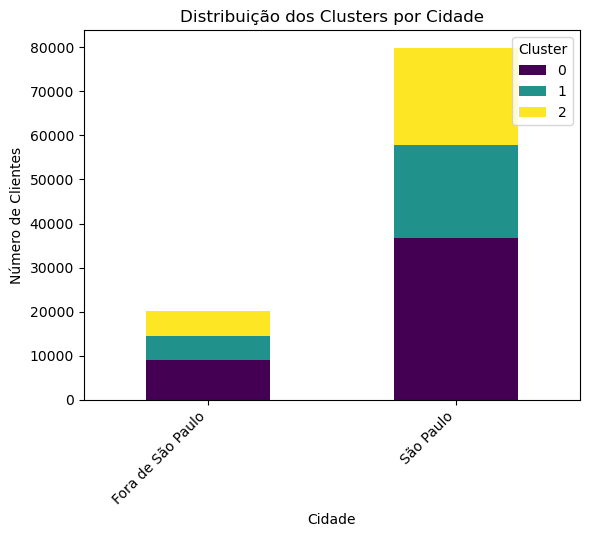

Distribuição dos Clusters por Cidade:
cluster                0      1      2
cidade                                
Fora de São Paulo   9028   5551   5591
São Paulo          36666  21240  21924


In [228]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Supondo que 'df' é o seu dataframe com os dados dos clientes

# Selecionar as variáveis relevantes para a clusterização
features = ['idade', 'atividade_fisica', 'renda_media', 'cidade']

# Criar um novo dataframe apenas com as features selecionadas
X = df[features]

# Converter a variável 'atividade_fisica' em representação numérica usando OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' para evitar a multicolinearidade
atividade_fisica_encoded = pd.DataFrame(encoder.fit_transform(X[['atividade_fisica']]), columns=encoder.get_feature_names(['atividade_fisica']))

# Concatenar as variáveis codificadas ao dataframe original e remover a coluna original
X_encoded = pd.concat([X, atividade_fisica_encoded], axis=1)
X_encoded.drop('atividade_fisica', axis=1, inplace=True)

# Aplicar o algoritmo K-Means para identificar clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Definir o número de clusters desejado
kmeans.fit(X_encoded[['idade', 'renda_media']])  # Apenas variáveis numéricas para a clusterização

# Adicionar os rótulos dos clusters ao dataframe original
df['cluster'] = kmeans.labels_

# Analisar a distribuição dos clusters por cidade
cluster_city_distribution = df.groupby(['cidade', 'cluster']).size().unstack(fill_value=0)

# Plotar um gráfico de barras para visualizar a distribuição dos clusters por cidade
plt.figure(figsize=(12, 8))
cluster_city_distribution.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('Cidade')
plt.ylabel('Número de Clientes')
plt.title('Distribuição dos Clusters por Cidade')
plt.legend(title='Cluster', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

# Mostrar a distribuição dos clusters por cidade
print("Distribuição dos Clusters por Cidade:")
print(cluster_city_distribution)
